In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [1,2,4,5],
    'y': [1,1,3,4]
})

In [13]:
np.random.seed(200)
k = 2
m=np.random.randint(0,4)
# centroids[i] = [x, y]
centroids ={}
print(m)
centroids[1] = [df['x'][m],df['y'][m]]

m=np.random.randint(0,4)
print(m)
centroids[2] = [df['x'][m],df['y'][m]]


#centroids = {
#if(m==0):
#    ={}
#    
#}'''

2
1


In [14]:
print(centroids)

{1: [4, 3], 2: [2, 1]}


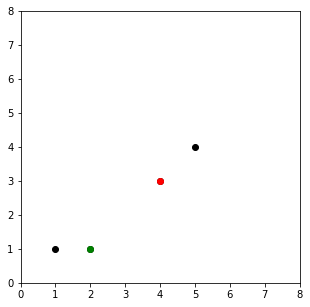

In [15]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

   x  y  distance_from_1  distance_from_2  closest color
0  1  1         3.605551         1.000000        2     g
1  2  1         2.828427         0.000000        2     g
2  4  3         0.000000         2.828427        1     r
3  5  4         1.414214         4.242641        1     r


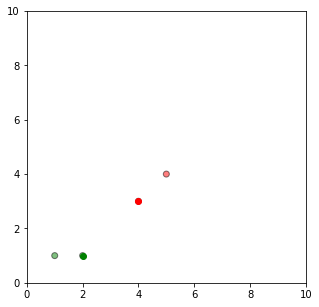

In [16]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()